In [18]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [19]:
data = pd.read_csv('C:\\Users\\rauna\\Desktop\\Raunak\\MINE\\Projects\\NNfromScratch\\pyNNscratch\\sample_submission.csv')

In [20]:
data.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [21]:
data = np.array(data)
m, n = data.shape

# shuffle before splitting into dev and training sets
np.random.shuffle(data) 

# T = transpose
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [22]:
Y_train

array([13186, 10662, 20058, ..., 19790, 25409,  9181], dtype=int64)

In [23]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.]])

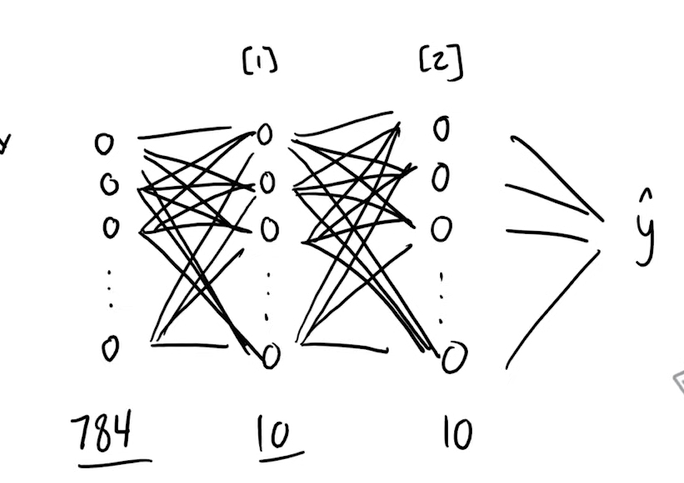

# forward propogation

In [24]:
# initializing arguments and parameters
def init_params(size):
    W1 = np.random.rand(10,size) - 0.5
    b1 = np.random.rand(10,1) - 0.5
    W2 = np.random.rand(10,10) - 0.5
    b2 = np.random.rand(10,1) - 0.5
    return W1,b1,W2,b2

In [25]:
# better than sigmoid 
def ReLU(Z):
    return np.maximum(Z,0)

In [26]:
def softmax(Z):
    exp = np.exp(Z - np.max(Z))
    return exp / exp.sum(axis=0)

In [27]:
def forward_propagation(X,W1,b1,W2,b2):
    Z1 = W1.dot(X) + b1 #10, m
    A1 = ReLU(Z1) # 10,m
    Z2 = W2.dot(A1) + b2 #10,m
    A2 = softmax(Z2) #10,m
    return Z1, A1, Z2, A2

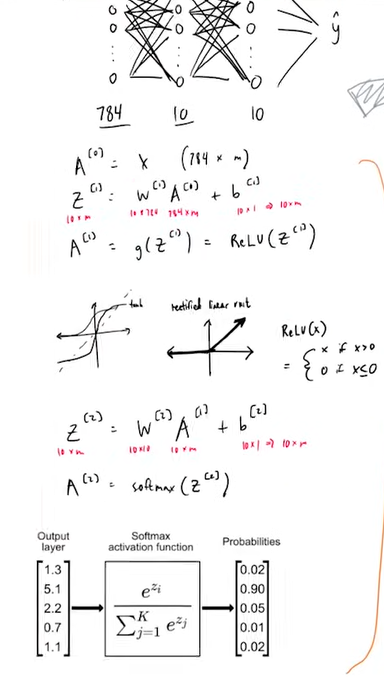

# backward propogation

In [28]:
# return an 0 vector with 1 only in the position correspondind to the value in Y
def one_hot(Y):
    one_hot_Y = np.zeros((Y.max()+1,Y.size)) #if the largest number in Y is 9 it makes 10 lines
    one_hot_Y[Y,np.arange(Y.size)] = 1 # puts a 1 in row Y[i] and in column i, changes the order but not the number
    return one_hot_Y

In [29]:
def derivative_ReLU(Z):
    return Z > 0

In [30]:
def backward_propagation(X, Y, A1, A2, W2, Z1, m):
    one_hot_Y = one_hot(Y)
    dZ2 = 2 * (A2 - one_hot_Y) #10,m
    dW2 = 1/m * (dZ2.dot(A1.T)) # 10 , 10
    db2 = 1/m * np.sum(dZ2, 1) # 10, 1
    dZ1 = W2.T.dot(dZ2) * derivative_ReLU(Z1) # 10, m
    dW1 = 1/m * (dZ1.dot(X.T)) #10, 784
    db1 = 1/m * np.sum(dZ1, 1) # 10, 1

    return dW1, db1, dW2, db2

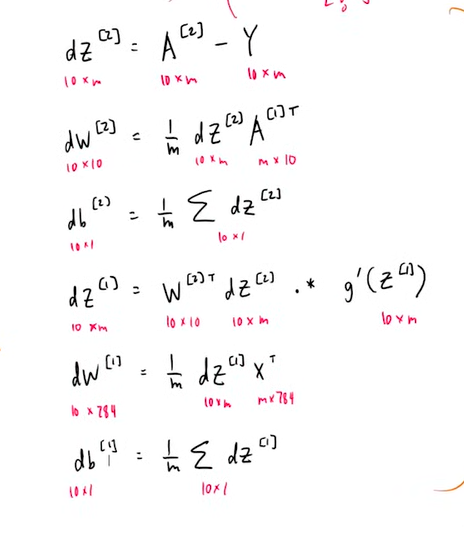

In [31]:
def update_params(alpha, W1, b1, W2, b2, dW1, db1, dW2, db2):
    W1 -= alpha * dW1
    b1 -= alpha * np.reshape(db1, (10,1))
    W2 -= alpha * dW2
    b2 -= alpha * np.reshape(db2, (10,1))

    return W1, b1, W2, b2

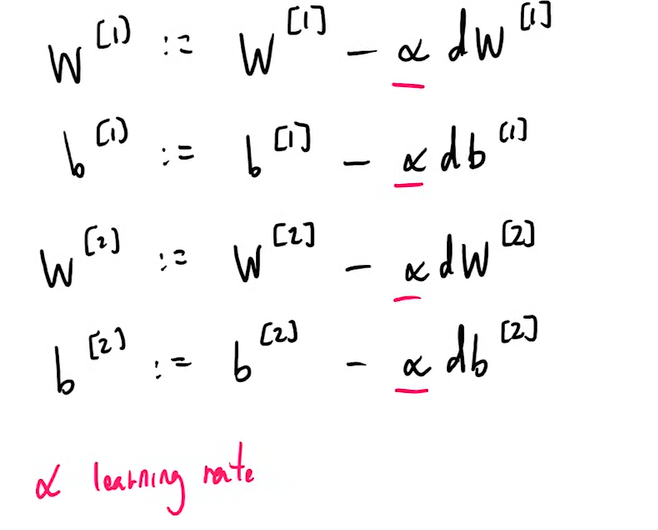

# gradient descent

In [32]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y)/Y.size

In [33]:
def gradient_descent(X, Y, alpha, iterations):
    size , m = X.shape

    W1, b1, W2, b2 = init_params(size)
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_propagation(X, W1, b1, W2, b2)
        
        dW1, db1, dW2, db2 = backward_propagation(X, Y, A1, A2, W2, Z1, m)

        W1, b1, W2, b2 = update_params(alpha, W1, b1, W2, b2, dW1, db1, dW2, db2)   

        if (i+1) % int(iterations/10) == 0:
            print(f"Iteration: {i+1} / {iterations}")
            prediction = get_predictions(A2)
            print(f'{get_accuracy(prediction, Y):.3%}')
    return W1, b1, W2, b2

In [34]:
def make_predictions(X, W1 ,b1, W2, b2):
    _, _, _, A2 = forward_propagation(X, W1, b1, W2, b2)
    predictions = get_predictions(A2)
    return predictions

def show_prediction(index,X, Y, W1, b1, W2, b2):
    vect_X = X[:, index,None]
    prediction = make_predictions(vect_X, W1, b1, W2, b2)
    label = Y[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = vect_X.reshape((WIDTH, HEIGHT)) * SCALE_FACTOR

    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()



In [35]:
import pickle
from keras.datasets import mnist
import matplotlib.pyplot as plt

Iteration: 20 / 200
51.963%
Iteration: 40 / 200
68.563%
Iteration: 60 / 200
72.550%
Iteration: 80 / 200
77.402%
Iteration: 100 / 200
79.372%
Iteration: 120 / 200
81.493%
Iteration: 140 / 200
82.623%
Iteration: 160 / 200
83.658%
Iteration: 180 / 200
84.485%
Iteration: 200 / 200
85.058%
Prediction:  [7]
Label:  7


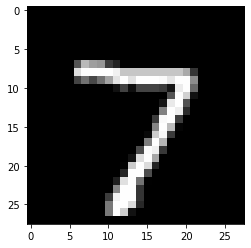

Prediction:  [2]
Label:  2


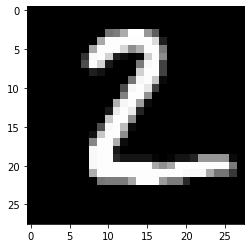

Prediction:  [1]
Label:  1


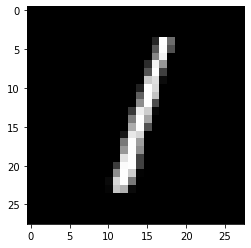

Prediction:  [6]
Label:  6


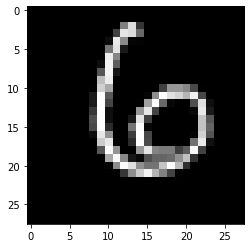

Prediction:  [3]
Label:  3


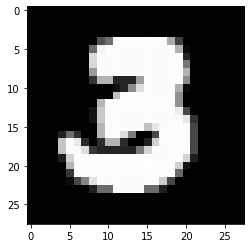

In [36]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# to avoid OverflowError
SCALE_FACTOR = 255 
WIDTH = X_train.shape[1]
HEIGHT = X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], WIDTH*HEIGHT).T / SCALE_FACTOR
X_test = X_test.reshape(X_test.shape[0], WIDTH*HEIGHT).T  / SCALE_FACTOR

W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.15, 200)
with open("trained_params.pkl","wb") as dump_file:
    pickle.dump((W1, b1, W2, b2),dump_file)

with open("trained_params.pkl","rb") as dump_file:
    W1, b1, W2, b2=pickle.load(dump_file)
show_prediction(0, X_test, Y_test, W1, b1, W2, b2)
show_prediction(1, X_test, Y_test, W1, b1, W2, b2)
show_prediction(2, X_test, Y_test, W1, b1, W2, b2)
show_prediction(100, X_test, Y_test, W1, b1, W2, b2)
show_prediction(200, X_test, Y_test, W1, b1, W2, b2)